In [1]:
data = "https://raw.githubusercontent.com/itsareebah/StudentFeedbackAnalysis/main/Students'%20feedback%20Proforma%202022.csv"

# Importing Data and Libraries



In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv(data)

In [3]:
df.head(2)

,Timestamp,Programme of Study,Faculty of Your study,Name of the Department,Semester of Study,Residence,Gender,Category,Academic [Content of Syllabi of the courses],Academic [Experience with extend and delivery of syllabus covered in the class],...,Skills developed during course of study [Clarity of Career Perspective],Skills developed during course of study [IT Skills],Skills developed during course of study [Communication Skills],Skills developed during course of study [Time Management],Skills developed during course of study [Problem Siolving Skills],Skills developed during course of study [Leadership Qualities],Skills developed during course of study [Critical Thinking],Overall University Experience [Your Overall academic experience],Overall University Experience [Would you recommend this University to others including ],"Suggestions, if any:"
0,2022/04/07 6:26:50 PM GMT+5:30,Masters,Social Sciences,Political science,IV,PG/Rented,Male,General,Excellent,Excellent,...,Good,Good,Good,Good,Good,Good,Good,Very Good,Excellent,Build more hostels
1,2022/04/07 6:30:06 PM GMT+5:30,Masters,Social Sciences,Political science,IV,Local,Male,SC,Below Average,Below Average,...,Below Average,Below Average,Averge,Below Average,Below Average,Below Average,Below Average,Below Average,Average,No


In [4]:
df.columns

Index(['Timestamp', 'Programme of Study', 'Faculty of Your study',
       ' Name of the Department ', 'Semester of Study', 'Residence', 'Gender',
       'Category', 'Academic [Content of Syllabi of the courses]',
       'Academic [Experience with extend and delivery of syllabus covered in the class]',
       'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
       'Academic [Experience with Internal assessement]',
       'Academic [Student Teacher Interaction]',
       'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
       'Academic [Integration of theory and practical classes]',
       'Academic [Stimulation for innovative thinking]',
       'Academic [Overall Learning experience]',
       'Academic [Condition of Lab Equipment ]',
       'Academic [Availability of Online resources]',
       'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
       'Academic

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 58 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Timestamp                                                                                                   2333 non-null   object
 1   Programme of Study                                                                                          2333 non-null   object
 2   Faculty of Your study                                                                                       2333 non-null   object
 3    Name of the Department                                                                                     2333 non-null   object
 4   Semester of Study                                                       

In [6]:
df.isnull().sum()
# no null values in data except in suggestions

Timestamp                                                                                                       0
Programme of Study                                                                                              0
Faculty of Your study                                                                                           0
 Name of the Department                                                                                         0
Semester of Study                                                                                               0
Residence                                                                                                       0
Gender                                                                                                          0
Category                                                                                                        0
Academic [Content of Syllabi of the courses]                                            

## DATA CLEANING
- replacing illegal values with null in suggestions
- replacing multiple inputs with final in programme name and faculty
- addressing wrong values in dept name

In [7]:
# Cleaning out null values from suggestiongs
null_val = {' ' : ['nan', 'NA' ,0, -1, '-', '--', '---', 'No', 3, '**', '.', '..', '....', '__', 'Abc', 'N', 'N.A.',
                   'N.A', 'N. A.', 'N/a', 'NO', 'N9', 'Na', 'Ni', 'Nil', 'Nik', 'No.', 'Non', 'None.', 'None','Obe',
                   ]}


for _, variations in null_val.items():
    df['Suggestions, if any:'].replace(variations, np.nan, inplace=True)

In [8]:
df[df['Suggestions, if any:'].isnull()].head(3)

,Timestamp,Programme of Study,Faculty of Your study,Name of the Department,Semester of Study,Residence,Gender,Category,Academic [Content of Syllabi of the courses],Academic [Experience with extend and delivery of syllabus covered in the class],...,Skills developed during course of study [Clarity of Career Perspective],Skills developed during course of study [IT Skills],Skills developed during course of study [Communication Skills],Skills developed during course of study [Time Management],Skills developed during course of study [Problem Siolving Skills],Skills developed during course of study [Leadership Qualities],Skills developed during course of study [Critical Thinking],Overall University Experience [Your Overall academic experience],Overall University Experience [Would you recommend this University to others including ],"Suggestions, if any:"
1,2022/04/07 6:30:06 PM GMT+5:30,Masters,Social Sciences,Political science,IV,Local,Male,SC,Below Average,Below Average,...,Below Average,Below Average,Averge,Below Average,Below Average,Below Average,Below Average,Below Average,Average,NaN
12,2022/04/07 6:39:33 PM GMT+5:30,Masters,Social Sciences,Department of political science,IV,PG/Rented,Female,General,Very Good,Excellent,...,Very Good,Very Good,Very Good,Very Good,Very Good,Very Good,Very Good,Very Good,Very Good,NaN
13,2022/04/07 6:42:33 PM GMT+5:30,Masters,Arts,Department of Political Science,IV,Local,Male,General,Average,Below Average,...,Good,Averge,Averge,Averge,Averge,Averge,Averge,Average,Average,NaN


In [9]:
# before
print(df['Programme of Study'].value_counts())
df['Programme of Study'].replace('UG;Masters', 'Masters', inplace = True)
df['Programme of Study'].replace('Masters;Ph.D', 'Ph.D', inplace = True)
df['Programme of Study'].replace('Masters;M.Phil', 'M.Phil', inplace = True)
df['Programme of Study'].replace('UG;Masters;M.Phil;Ph.D', 'Ph.D', inplace = True)

# after
print('\n', df['Programme of Study'].value_counts())

Masters                   1731
UG                         274
Ph.D                       255
M.Phil                      60
UG;Masters                   4
Masters;Ph.D                 4
Masters;M.Phil               3
UG;Masters;M.Phil;Ph.D       2
Name: Programme of Study, dtype: int64

 Masters    1735
UG          274
Ph.D        261
M.Phil       63
Name: Programme of Study, dtype: int64


In [10]:
# before
print('\n', df['Faculty of Your study'].value_counts())
val = df['Faculty of Your study'].unique()

for i in val:
    df['Faculty of Your study'].replace( i , i.split(';')[0], inplace = True)

# after
print('\n', df['Faculty of Your study'].value_counts())


 Science                                  627
Social Sciences                          450
Arts                                     450
Mathematical Sciences                    162
Music and Fine Arts                      154
Management Studies                       129
Commerce                                 113
Law                                      102
Education                                 72
Interdisciplinary                         25
Social Sciences;Arts                      14
Management Studies;Commerce               10
Science;Interdisciplinary                  6
Science;Mathematical Sciences              5
Science;Social Sciences                    4
Arts;Education                             2
Education;Mathematical Sciences            2
Arts;Management Studies                    2
Science;Law                                1
Education;Management Studies;Commerce      1
Social Sciences;Music and Fine Arts        1
Science;Arts                               1
Name: Fa

In [11]:
# Name of the Department
depts = ['political science', 'law', 'sociology', 'psychology', 'commerce', 'botany', 'mba','chemistry', 'sanskrit',
        'finance', 'geography', 'economics', 'african Studies', 'romance studies', 'financial studies', 'physics',
        'music', 'statistics', 'punjabi', 'Philosophy', 'East Asian', 'Microbiology', 'Zoology', 'Social Work',
        'Electronic', 'computer science', 'biology', 'education', 'cluster Innovation centre', 'geology', 'anthropology',
        'Biomedical', 'programme', 'genetics', 'chemistry', 'Persian', 'Social Science']
# before
val = df[' Name of the Department '].unique()
for i in val:
    for j in depts:
        if j.lower() in i.lower():
            df[' Name of the Department '].replace( i , j, inplace = True)

In [12]:
department_mapping = {
    'Political Science': ['political science', 'Department of political t', 'Department  of Political  science',
                         'Department of Political’s Science ', 'Pol science', 'DEPARTMENT OF POLITICAL SCENCE',
                         'Political  Science ', 'Department of polu'],

    'Germanic and Romance Studies': ['Germanic and romance department ', 'GRS', 'Germen nd romanic study',
                                     'Department of Germanic and roman studies', 'Germen nd romanic study',
                                     'Department of Germanic and Romance Languages', 'DGRS', 'romance studies',
                                    'Department of Romance and Germanic Studies', 'Germen nd romanic study ',
                                     'Department of Germanic and Romance Study ', 'GRS ', 'grs', 'Grs'],

    'Cluster Innovation Centre': ['Cluster innovation centre', 'Cluster Innovation Centre ',
                                  'CLUSTER INNOVATION CENTRE', 'Cluster Inovation Centre (Mathematics Education)',
                                  'CIC , MME', 'Cluster Innovation Centre', 'Clc', 'CIE'],

    'Indian Literature':['Department  of Modern Indian Languages and Literary Studies',
                        'Comparative Indian ', 'Indian Literature', 'M.A. Compatitive Indian literature',
                         'Department of Modern Indian Languages and Literary studies '],

    'Arabic':['Deptt. Of Arabic',  'Department of Arabic ', 'Department of arabic ',  'Arabic ',
                  'Deptt.of Arabic', 'ARABIC', 'Arabic department', 'Department of Arabic'],

    'East asian':['East aisan department '],
    'education':['डिपार्टमेंट ऑफ एजुकेशन', ],
    'chemistry' :['chemistry', 'Chemsitry'],
    'Computer Science':['computer science', 'DUCS', 'DUCS ','Computer Science',],
    'ACBR':['ACBR,DU', 'Acbr', 'Acbr , du', 'ACBR', 'ACBR University of Delhi', 'ACBR '],
    'DFBE':[ 'DFBE', 'DFBE ' ,'Dfs', 'DFS', 'Dfbe'],
    'Commerce':['financial studies', 'finance', 'M.Com', 'M.com', 'Conmerce'],
    'LAW':['LC-1', 'Llm', 'LL.M.', 'LLM (2-Years)'],
    'Department of Arts':['programme' 'BA program','Ba program ',  'BA prog', 'Fine arts', 'BA program', 'programme']
}

for standard_name, variations in department_mapping.items():
    df[' Name of the Department '].replace(variations, standard_name, inplace=True)

df = df.groupby(' Name of the Department ').filter(lambda x : len(x)>10).reset_index()

print('\n', df[' Name of the Department '].unique())


 ['Political Science' 'law' 'geography' 'Germanic and Romance Studies'
 'punjabi' 'sociology' 'botany' 'Electronic' 'East Asian' 'Philosophy'
 'Social Work' 'psychology' 'economics' 'ACBR' 'Biomedical' 'Arabic'
 'geology' 'commerce' 'anthropology' 'Commerce' 'chemistry'
 'Computer Science' 'education' 'statistics' 'biology' 'sanskrit' 'music'
 'physics' 'african Studies' 'DFBE' 'Zoology']


In [13]:
print('\n', df['Semester of Study'].value_counts())
val = df['Semester of Study'].unique()
for i in val:
    df['Semester of Study'].replace(i, i.split(';')[-1], inplace=True)
df['Semester of Study'].value_counts()


 IV                            874
I                             572
II                            447
VI                            108
Beyond VI                     104
III                            61
V                              31
I;II                           25
I;II;III;IV                    22
I;II;III;IV;V;VI                4
IV;V                            3
II;III                          3
III;IV                          2
III;VI                          2
IV;VI                           2
V;VI                            1
IV;Beyond VI                    1
I;II;III;IV;V;VI;Beyond VI      1
II;IV                           1
I;II;III                        1
Name: Semester of Study, dtype: int64


IV           899
I            572
II           472
VI           117
Beyond VI    106
III           65
V             34
Name: Semester of Study, dtype: int64

In [14]:
print('\n', df['Residence'].value_counts())
val = df['Residence'].unique()
for i in val:
    df['Residence'].replace(i, i.split(';')[0], inplace=True)
df['Residence'].value_counts()


 PG/Rented           988
Local               563
NCR                 396
Other               174
Hostel              115
Local;NCR            13
Hostel;PG/Rented      4
PG/Rented;Local       3
PG/Rented;Other       3
Local;Other           2
Hostel;Other          1
NCR;Other             1
PG/Rented;NCR         1
Hostel;Local;NCR      1
Name: Residence, dtype: int64


PG/Rented    995
Local        578
NCR          397
Other        174
Hostel       121
Name: Residence, dtype: int64

In [15]:
print('\n', df['Category'].value_counts())

val = df['Category'].unique()
for i in val:
    df['Category'].replace(i, i.split(';')[-1], inplace=True)
df['Category'].value_counts()


 General            1053
OBC                 572
SC                  259
EWS                 181
ST                  113
PwD                  31
Other                20
General;EWS          15
General;PwD           5
General;OBC           4
General;Other         2
ST;PwD                2
OBC;PwD               2
SC;PwD                2
EWS;PwD               2
OBC;SC                1
General;OBC;EWS       1
Name: Category, dtype: int64


General    1053
OBC         576
SC          260
EWS         197
ST          113
PwD          44
Other        22
Name: Category, dtype: int64

## Encoding ratings data accordingly

In [16]:
df['Overall University Experience [Would you recommend this University to others including ]'].value_counts()

Good              680
Excellent         519
Very Good         512
Average           325
Below Average     146
Don't Know         68
Not Applicable     15
Name: Overall University Experience [Would you recommend this University to others including ], dtype: int64

In [17]:
rating = {
    5 : ['Excellent'],
    4 : ['Very Good'],
    3 : ['Good'],
    2 : ['Average', 'Averge'],
    1 : ['Below Average'],
    0 : ["Don't Know", "Don't know"],
    -1 : ['Not Applicable', 'Not  Applicable', 'Not applicable'],
}

for rating, value in rating.items():
    df.replace(value, rating, inplace=True)

## Ordinal Encoding rest of the categorical variables except suggestions

In [18]:
enc = OrdinalEncoder()
df_encoded = df.copy().drop(['index', 'Timestamp'], axis = 1)
df_encoded[[ 'Programme of Study', 'Faculty of Your study',
       ' Name of the Department ', 'Semester of Study', 'Residence', 'Gender',
       'Category']] = enc.fit_transform(df_encoded[[ 'Programme of Study', 'Faculty of Your study',
       ' Name of the Department ', 'Semester of Study', 'Residence', 'Gender',
       'Category']])


In [19]:
df_encoded.head(4)

,Programme of Study,Faculty of Your study,Name of the Department,Semester of Study,Residence,Gender,Category,Academic [Content of Syllabi of the courses],Academic [Experience with extend and delivery of syllabus covered in the class],Academic [Use of teaching aids and ICT in the class to facilitate teaching ],...,Skills developed during course of study [Clarity of Career Perspective],Skills developed during course of study [IT Skills],Skills developed during course of study [Communication Skills],Skills developed during course of study [Time Management],Skills developed during course of study [Problem Siolving Skills],Skills developed during course of study [Leadership Qualities],Skills developed during course of study [Critical Thinking],Overall University Experience [Your Overall academic experience],Overall University Experience [Would you recommend this University to others including ],"Suggestions, if any:"
0,1.0,9.0,10.0,4.0,4.0,1.0,1.0,5,5,5,...,3,3,3,3,3,3,3,4,5,Build more hostels
1,1.0,9.0,10.0,4.0,1.0,1.0,5.0,1,1,1,...,1,1,2,1,1,1,1,1,2,NaN
2,1.0,9.0,10.0,4.0,4.0,1.0,0.0,5,3,1,...,3,3,3,3,3,3,3,4,5,There should more infrastructure facilities li...
3,1.0,9.0,10.0,4.0,4.0,1.0,2.0,5,5,5,...,3,3,3,3,3,3,3,3,3,More skill based courses should be imparted


## Plotting -  Areebah
- Cluster analysis to understand spread of students skills building
- heatmap to understand how different infrastructrial things are correlated
- distribution of overall academic experience
- Radar chart to understand strengths and weaknesses of all the departments
- Distribution of different residential status in different faculty 
- Word Cloud to extract keyword around which most suggestions are made

In [20]:
from sklearn.cluster import KMeans
ratings_data = df_encoded.iloc[:, 44:54]

num_clusters = 4
kmeans = KMeans(n_init=10, n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(ratings_data)
ratings_data['Cluster'] = cluster_labels

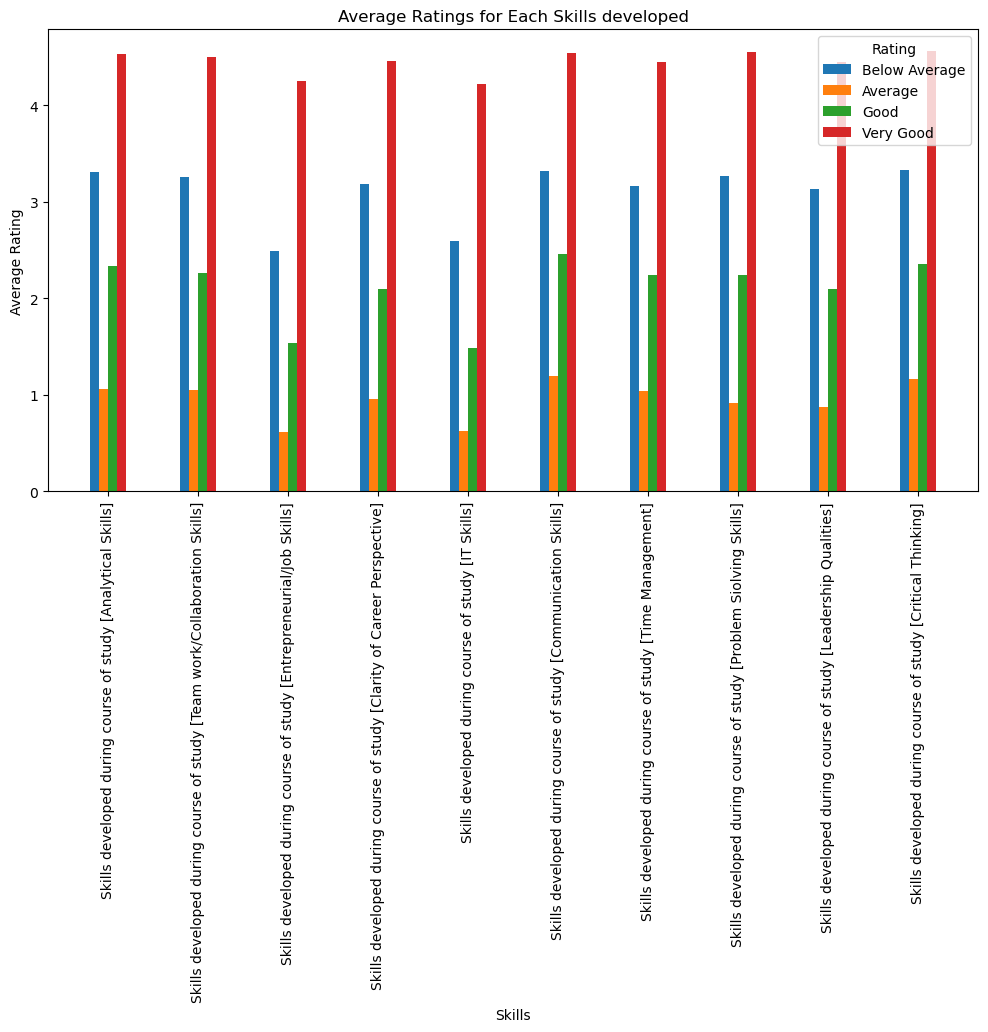

In [21]:
cluster_groups = ratings_data.groupby('Cluster')

cluster_avg_ratings = cluster_groups.mean()

rating_legend_mapping = { 
    5 : 'Excellent',
    4 : 'Very Good',
    3 : 'Good',
    2 : 'Average',
    1 : 'Below Average',
}

plt.figure(figsize=(12, 6))
bar_width = 0.1
index = np.arange(len(cluster_avg_ratings.columns))
for i in range(num_clusters):
    plt.bar(index + i * bar_width, cluster_avg_ratings.iloc[i], width=bar_width, label=f'Cluster {i + 1}')

plt.xticks(index + (bar_width * (num_clusters - 1)) / 2, cluster_avg_ratings.columns, rotation=90)
plt.xlabel('Skills')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Skills developed')
plt.legend(title='Rating', labels=[rating_legend_mapping[rating] for rating in range(1, 6)])
plt.show()

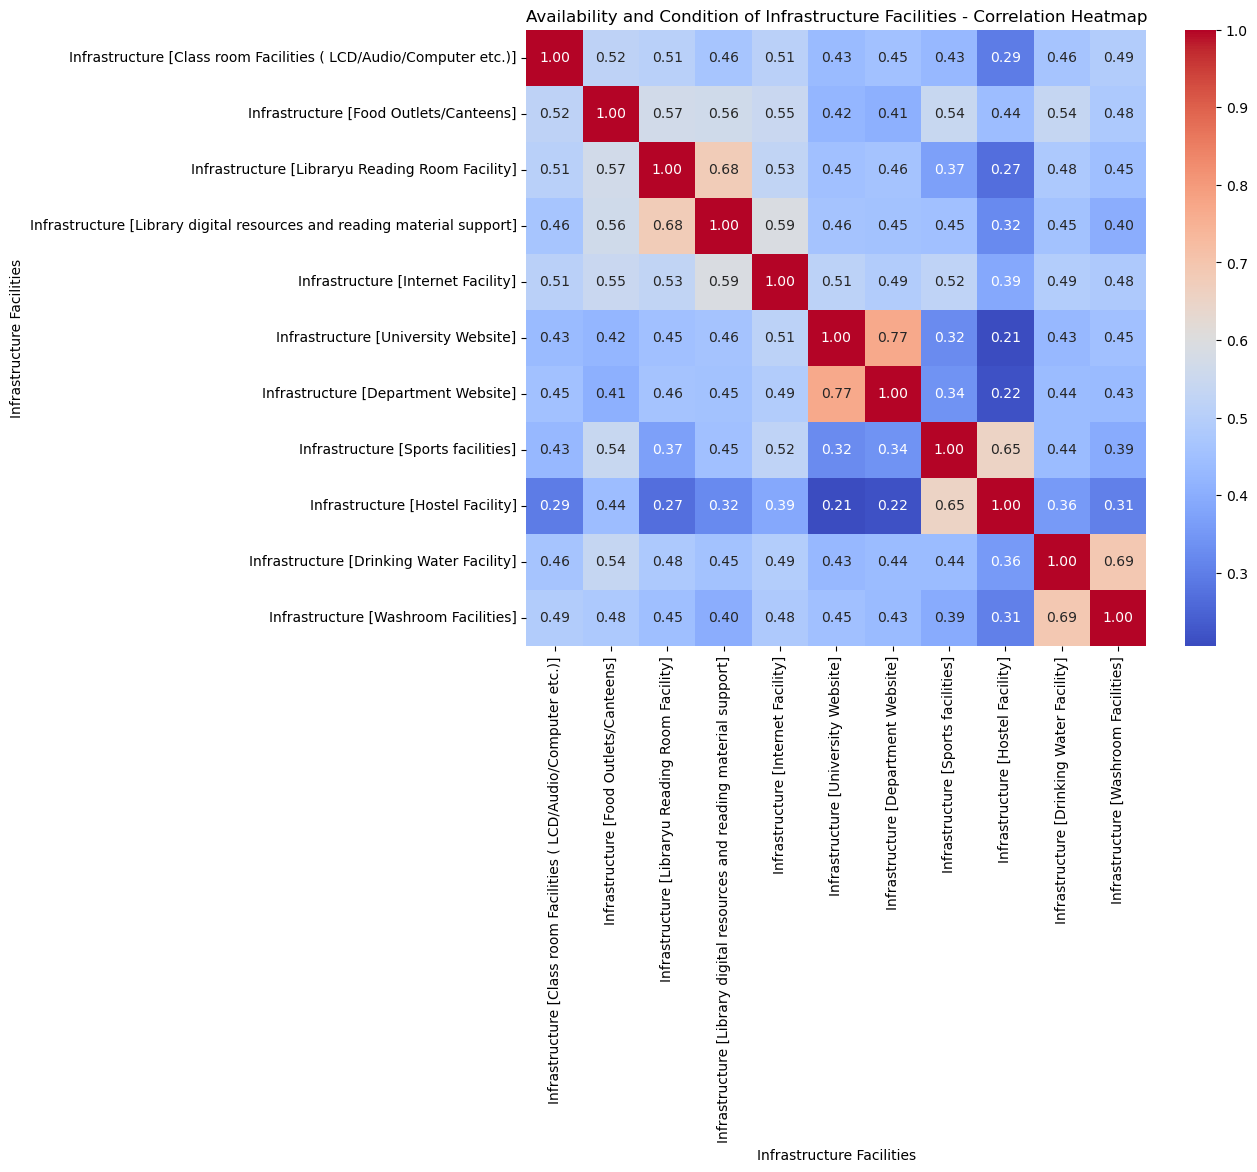

In [22]:
infrastructure_columns = [ 'Infrastructure [Class room Facilities ( LCD/Audio/Computer etc.)]',
       'Infrastructure [Food Outlets/Canteens]',
       'Infrastructure [Libraryu Reading Room Facility]',
       'Infrastructure [Library digital resources and reading material support]',
       'Infrastructure [Internet Facility]',
       'Infrastructure [University Website]',
       'Infrastructure [Department Website]',
       'Infrastructure [Sports facilities]',
       'Infrastructure [Hostel Facility]',
       'Infrastructure [Drinking Water Facility]',
       'Infrastructure [Washroom Facilities]',]

infrastructure_data = df_encoded[infrastructure_columns]

plt.figure(figsize=(10, 8))
sb.heatmap(infrastructure_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Availability and Condition of Infrastructure Facilities - Correlation Heatmap')
plt.xlabel('Infrastructure Facilities')
plt.ylabel('Infrastructure Facilities')
plt.xticks(rotation=90)
plt.show()

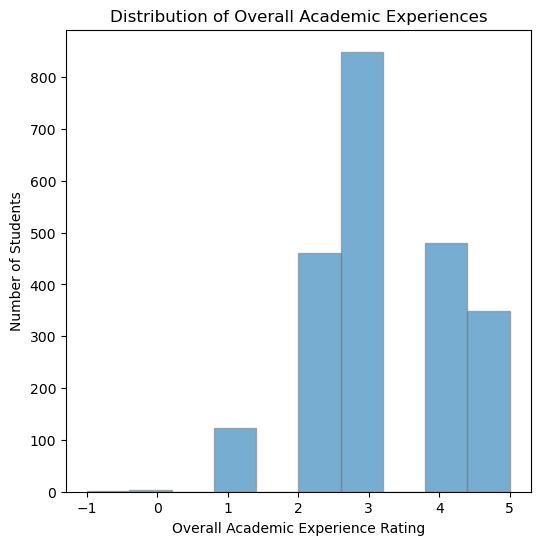

In [23]:
# To understand distribution of overall experience of students in the university

overall_experience = df_encoded['Overall University Experience [Your Overall academic experience]']
plt.figure(figsize=(6, 6))
plt.hist(overall_experience, bins=10, edgecolor='gray', alpha=0.6)
plt.xlabel('Overall Academic Experience Rating')
plt.ylabel('Number of Students')
plt.title('Distribution of Overall Academic Experiences')
plt.show()

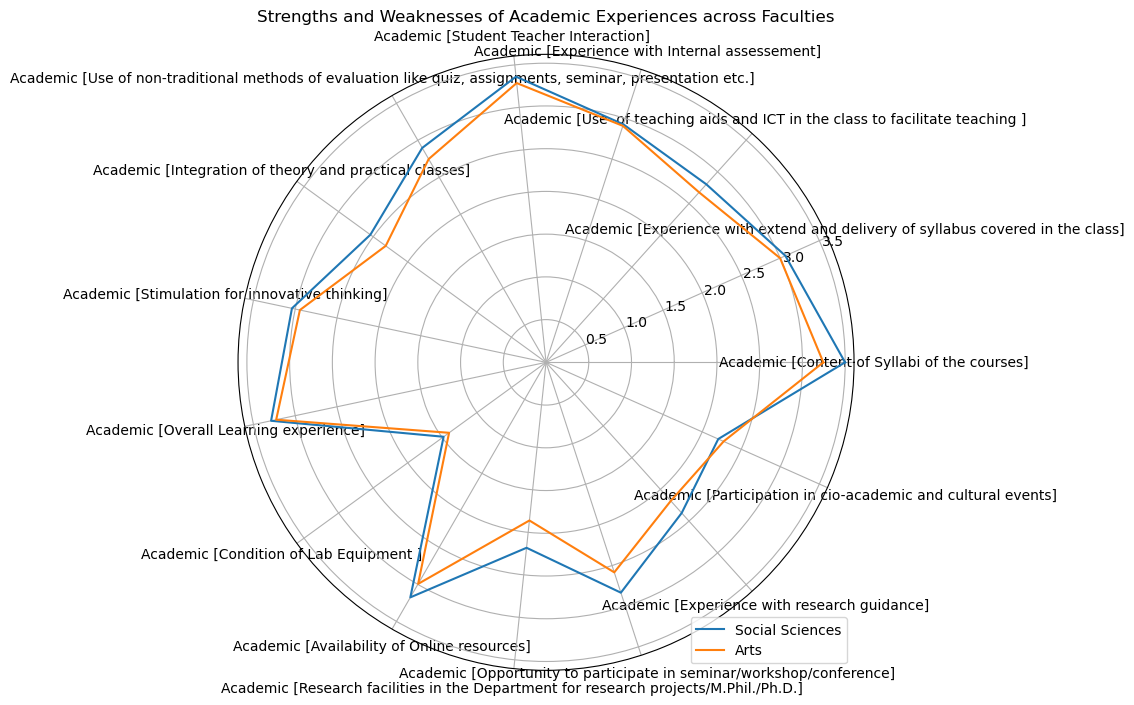

In [24]:
# Columns related to academic experiences
academic_columns = ['Academic [Content of Syllabi of the courses]',
                    'Academic [Experience with extend and delivery of syllabus covered in the class]',
                    'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
                    'Academic [Experience with Internal assessement]',
                    'Academic [Student Teacher Interaction]',
                    'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
                    'Academic [Integration of theory and practical classes]',
                    'Academic [Stimulation for innovative thinking]',
                    'Academic [Overall Learning experience]',
                    'Academic [Condition of Lab Equipment ]',
                    'Academic [Availability of Online resources]',
                    'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
                    'Academic [Opportunity to participate in seminar/workshop/conference]',
                    'Academic [Experience with research guidance]',
                    'Academic [Participation in cio-academic and cultural events]']

faculties = df['Faculty of Your study'].unique()
average_ratings = {}
for faculty in faculties:
    faculty_data = df[df['Faculty of Your study'] == faculty]
    average_ratings[faculty] = faculty_data[academic_columns].mean()

# radar chart
num_categories = len(academic_columns)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False) 
angles = np.concatenate((angles, [angles[0]])) # to circle back

plt.figure(figsize=(10, 8))
for faculty in faculties[0:2]:
    values = average_ratings[faculty].values
    values = np.concatenate((values, [values[0]]))
    plt.polar(angles, values, label=faculty)

plt.title('Strengths and Weaknesses of Academic Experiences across Faculties')
plt.xticks(angles[:-1], academic_columns, fontsize=10)
plt.legend(loc='lower right')
plt.show()

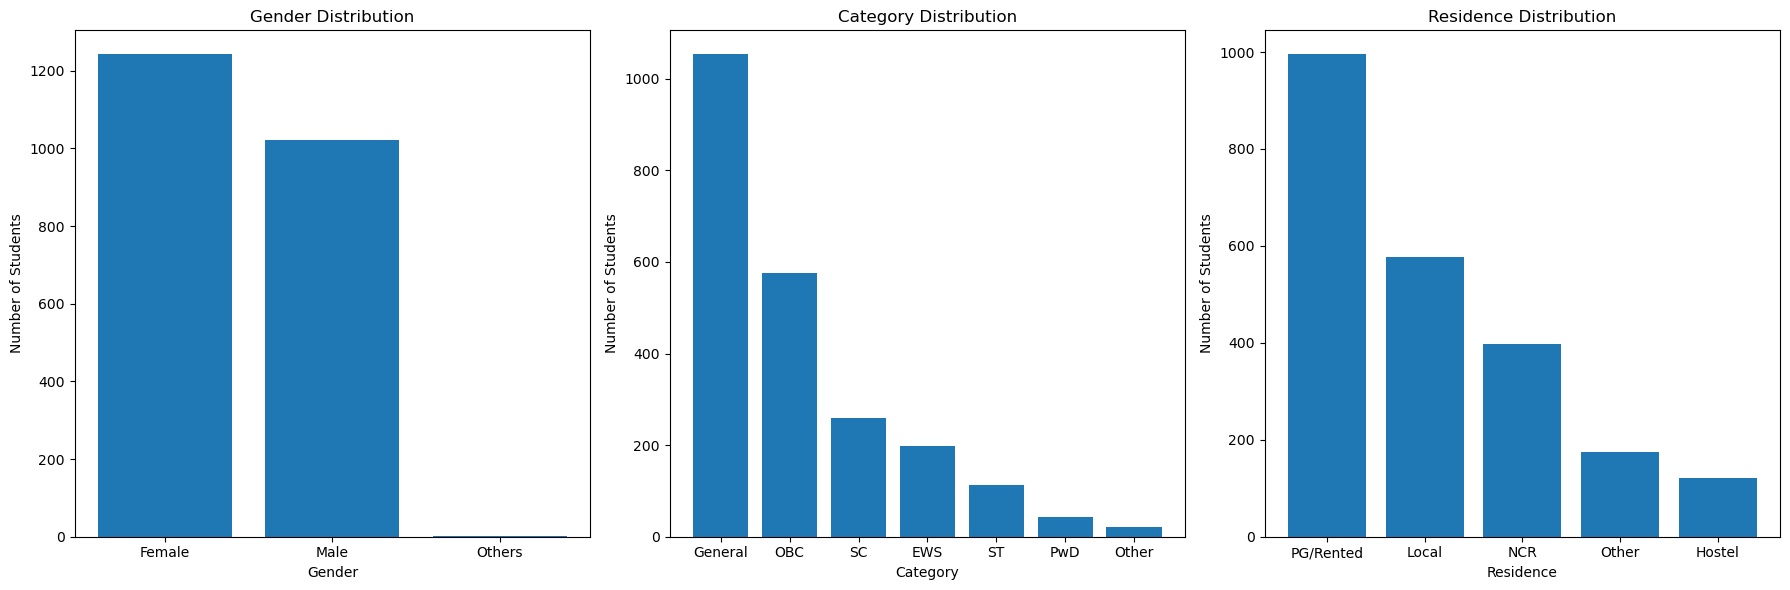

In [25]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
gender_percentage = gender_counts / len(data) * 100

# Category distribution
category_counts = df['Category'].value_counts()
category_percentage = category_counts / len(data) * 100

# Residence distribution
residence_counts = df['Residence'].value_counts()
residence_percentage = residence_counts / len(data) * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Students')
axes[0].set_title('Gender Distribution')

# Category distribution plot
axes[1].bar(category_counts.index, category_counts.values)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Number of Students')
axes[1].set_title('Category Distribution')

# Residence distribution plot
axes[2].bar(residence_counts.index, residence_counts.values)
axes[2].set_xlabel('Residence')
axes[2].set_ylabel('Number of Students')
axes[2].set_title('Residence Distribution')

plt.tight_layout()
plt.show()


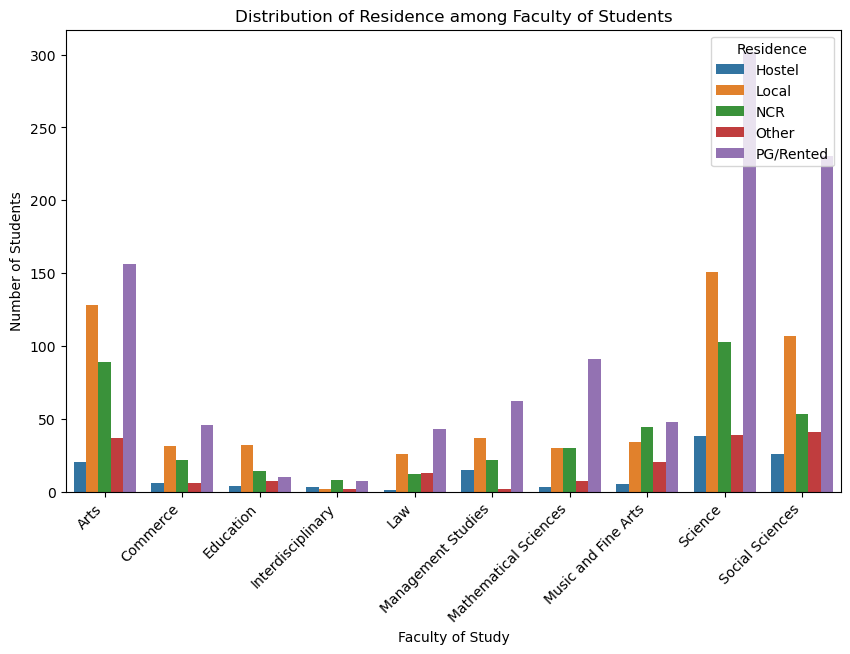

In [27]:
residence_distribution = df.groupby(['Faculty of Your study', 'Residence']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sb.barplot(x='Faculty of Your study', y='Count', hue='Residence', data=residence_distribution)
plt.xlabel('Faculty of Study')
plt.ylabel('Number of Students')
plt.title('Distribution of Residence among Faculty of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residence', loc='upper right')
plt.show()

In [217]:
!pip install wordcloud

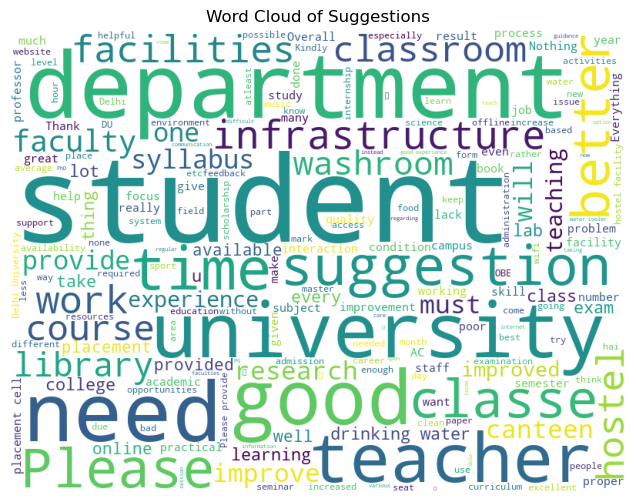

In [37]:
from wordcloud import WordCloud

suggestions_text = ' '.join(df['Suggestions, if any:'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=600, background_color='white').generate(suggestions_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, )
plt.axis('off')
plt.title('Word Cloud of Suggestions')
plt.show()